In [14]:
import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#from lightcurve_plots import plot_save_lc

In [15]:
register_set = 'Pal5A_V'
lc_num = 9

## add names column

In [16]:
!ls Pal5A_V/

lc12.data  lc13.data  lc15.data  lc9.data


In [17]:
lc_df = pd.read_csv(f'{register_set}/lc{lc_num}.data', delim_whitespace=True, header=None)

lc_df.columns = ['jd', 'flux', 'err_flux', 'ref_flux', 'err_ref', 'SNR']
lc_df

/tmp/ipykernel_24524/2533945225.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lc_df = pd.read_csv(f'{register_set}/lc{lc_num}.data', delim_whitespace=True, header=None)


,jd,flux,err_flux,ref_flux,err_ref,SNR
0,371.828378,2330.3345,379.9308,2339.3776,389.5519,0.7012
1,371.832473,2613.1927,356.6691,2638.6338,368.3159,0.7111
2,371.836568,2418.7745,364.9552,2252.9374,376.7026,0.6945
3,371.840674,3112.7447,357.0031,3038.2043,368.6674,0.7587
4,371.844785,2924.9313,353.2172,2831.5563,366.2554,0.7229
...,...,...,...,...,...,...
62,372.801835,-6709.9055,416.8060,-6955.4936,427.1608,0.9024
63,372.805939,-6265.8645,413.8622,-6628.5016,426.6330,0.8836
64,372.810036,-6305.9827,440.4370,-6413.3540,448.8619,0.8944
65,372.814133,-6230.9665,431.7373,-6296.1297,441.0562,0.8779


In [19]:
!ls ..

abs	detect	 images4  imagesPal5A_V  register2  register8	     utils
bin	extract  images5  install.csh	 register3  register9
Bphot	fit2d	 images6  interp	 register4  registerPal5A_V
Cphot	images	 images7  isis_tools	 register5  short.h
cross	images2  images8  phot_ref	 register6  stack
czerny	images3  images9  register	 register7  subtract


In [20]:
dates_df = pd.read_csv(f'../register{register_set}/dates', delim_whitespace=True, header=None)
dates_df.columns = ['name', 'jd']

dates_df

/tmp/ipykernel_24524/1491390003.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dates_df = pd.read_csv(f'../register{register_set}/dates', delim_whitespace=True, header=None)


,name,jd
0,202504060002o.fit,371.828378
1,202504060004o.fit,371.832473
2,202504060006o.fit,371.836568
3,202504060008o.fit,371.840674
4,202504060010o.fit,371.844785
...,...,...
62,202504070127o.fit,372.801835
63,202504070129o.fit,372.805939
64,202504070131o.fit,372.810036
65,202504070133o.fit,372.814133


In [21]:
lc_df_w_names = pd.merge(lc_df, dates_df[['jd', 'name']], on='jd', how='left')

lc_df_w_names


,jd,flux,err_flux,ref_flux,err_ref,SNR,name
0,371.828378,2330.3345,379.9308,2339.3776,389.5519,0.7012,202504060002o.fit
1,371.832473,2613.1927,356.6691,2638.6338,368.3159,0.7111,202504060004o.fit
2,371.836568,2418.7745,364.9552,2252.9374,376.7026,0.6945,202504060006o.fit
3,371.840674,3112.7447,357.0031,3038.2043,368.6674,0.7587,202504060008o.fit
4,371.844785,2924.9313,353.2172,2831.5563,366.2554,0.7229,202504060010o.fit
...,...,...,...,...,...,...,...
62,372.801835,-6709.9055,416.8060,-6955.4936,427.1608,0.9024,202504070127o.fit
63,372.805939,-6265.8645,413.8622,-6628.5016,426.6330,0.8836,202504070129o.fit
64,372.810036,-6305.9827,440.4370,-6413.3540,448.8619,0.8944,202504070131o.fit
65,372.814133,-6230.9665,431.7373,-6296.1297,441.0562,0.8779,202504070133o.fit


### Magnitudes instrumentales

mag = 25.0 - 2.5 * log10 (flux) + 2.5 * log10 (exptime)


In [30]:
exptime = 180
lc_df_w_names['instrMag'] =  25.0 - 2.5 * np.log10(lc_df_w_names['flux']) + 2.5 * np.log10(exptime)

lc_df_w_names

,jd,flux,err_flux,ref_flux,err_ref,SNR,name,instrMag
0,371.828378,2330.3345,379.9308,2339.3776,389.5519,0.7012,202504060002o.fit,22.219636
1,371.832473,2613.1927,356.6691,2638.6338,368.3159,0.7111,202504060004o.fit,22.095253
2,371.836568,2418.7745,364.9552,2252.9374,376.7026,0.6945,202504060006o.fit,22.179193
3,371.840674,3112.7447,357.0031,3038.2043,368.6674,0.7587,202504060008o.fit,21.905323
4,371.844785,2924.9313,353.2172,2831.5563,366.2554,0.7229,202504060010o.fit,21.972892
...,...,...,...,...,...,...,...,...
62,372.801835,-6709.9055,416.8060,-6955.4936,427.1608,0.9024,202504070127o.fit,NaN
63,372.805939,-6265.8645,413.8622,-6628.5016,426.6330,0.8836,202504070129o.fit,NaN
64,372.810036,-6305.9827,440.4370,-6413.3540,448.8619,0.8944,202504070131o.fit,NaN
65,372.814133,-6230.9665,431.7373,-6296.1297,441.0562,0.8779,202504070133o.fit,NaN


## rejection

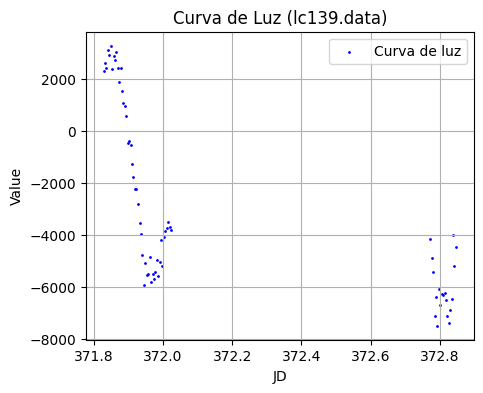

In [23]:
# Generar la grafica
plt.figure(figsize=(5, 4))
plt.scatter(lc_df_w_names['jd'], lc_df_w_names['flux'], s=1, color='blue', label='Curva de luz')
plt.xlabel('JD')
plt.ylabel('Value')
plt.title('Curva de Luz (lc139.data)')
plt.legend()
plt.grid()
#plt.show()

## implementamos

In [27]:
# Convertir la columna 'value' a un array de NumPy
elements = np.array(lc_df_w_names['SNR'])

# Calcular la media y la desviación estándar
mean = np.mean(elements)
sd = np.std(elements)

# Filtrar el DataFrame
filtered_df = lc_df_w_names[
    (lc_df_w_names['SNR'] > mean - 2 * sd) & 
    (lc_df_w_names['SNR'] < mean + 2 * sd)
]

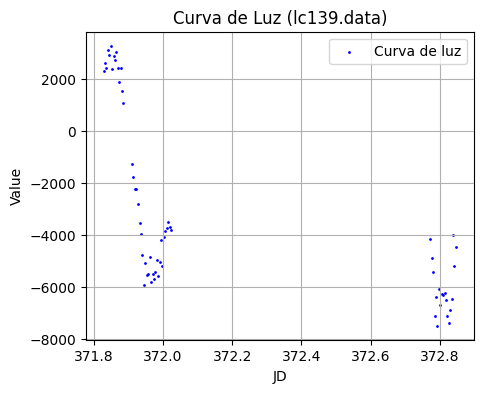

In [28]:
# Generar la grafica
plt.figure(figsize=(5, 4))
plt.scatter(filtered_df['jd'], filtered_df['flux'], s=1, color='blue', label='Curva de luz')
plt.xlabel('JD')
plt.ylabel('Value')
plt.title('Curva de Luz (lc139.data)')
plt.legend()
plt.grid()
#plt.show()

In [40]:
filtered_df.describe()

,jd,value,2,3,4,5
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,36.183053,1059.845081,267.235969,1016.849413,274.714104,0.769658
std,3.532507,3488.816861,37.191287,3498.238990,35.766507,0.253324
min,31.762680,-5082.744400,173.277400,-5068.452500,177.472900,0.003600
25%,32.897700,-2129.629200,240.970900,-2197.606900,249.453900,0.681600
50%,34.906261,873.140000,260.683200,830.138300,268.785300,0.888000
75%,36.968610,4463.582500,288.059000,4454.746600,294.196300,0.945700
max,41.984419,6563.526100,453.717300,6515.504100,456.302300,0.984900


In [41]:
lc139_df_w_names.describe()

,jd,value,2,3,4,5
count,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,36.049877,1391.825437,266.660008,1352.866736,274.053338,0.774093
std,3.553981,3899.794175,36.849128,3918.719187,35.496959,0.250532
min,31.762680,-5082.744400,173.277400,-5068.452500,177.472900,0.003600
25%,32.864329,-2079.021625,240.707200,-2183.320650,249.376875,0.702300
50%,34.885776,1078.383850,260.340100,1045.814550,268.094050,0.893300
75%,36.958383,4776.749500,286.168900,4764.861625,293.378950,0.945325
max,41.984419,13216.672200,453.717300,13379.100700,456.302300,0.984900


In [42]:
# Filtrar el DataFrame para obtener las filas que NO cumplen la condición (descartados)
discarded_df = lc139_df_w_names[
    ~((lc139_df_w_names['value'] > mean - 2 * sd) & 
      (lc139_df_w_names['value'] < mean + 2 * sd))
]

discarded_df

,jd,value,2,3,4,5,name
37,31.931653,12769.4873,255.0443,12891.7883,259.5286,0.9319,202405010252o.fits
38,31.934353,13216.6722,263.0448,13379.1007,267.6944,0.9479,202405010254o.fits
39,31.937083,12650.8808,257.2218,12762.0583,261.4844,0.9426,202405010256o.fits
40,31.939789,12844.2083,252.2855,12912.5827,256.8419,0.9357,202405010258o.fits
41,31.942523,12531.0588,256.5565,12631.7199,261.4324,0.9339,202405010260o.fits
42,31.945223,10703.6485,265.2002,11026.9257,270.1994,0.9024,202405010262o.fits
43,31.958358,11425.5349,243.6238,11385.5474,249.5322,0.8992,202405010269o.fits
44,31.961097,11361.6380,219.8945,11436.8831,225.4508,0.8934,202405010271o.fits
45,31.963837,11708.1924,226.4971,11787.3709,231.4289,0.9027,202405010273o.fits
46,31.966566,10981.0381,232.8504,11048.9177,238.2654,0.8932,202405010275o.fits


In [43]:
discarded_df['name']

37    202405010252o.fits
38    202405010254o.fits
39    202405010256o.fits
40    202405010258o.fits
41    202405010260o.fits
42    202405010262o.fits
43    202405010269o.fits
44    202405010271o.fits
45    202405010273o.fits
46    202405010275o.fits
47    202405010277o.fits
48    202405010279o.fits
49    202405010281o.fits
50    202405010283o.fits
51    202405010285o.fits
Name: name, dtype: object

In [44]:
discarded_df['value'].sort_values()

50    10540.4858
51    10556.7782
47    10656.0533
42    10703.6485
48    10892.9180
46    10981.0381
49    11081.7310
44    11361.6380
43    11425.5349
45    11708.1924
41    12531.0588
39    12650.8808
37    12769.4873
40    12844.2083
38    13216.6722
Name: value, dtype: float64